# Tugas Clustering Apache Spark

Datasets: [NYS Motor Vehicle Crashes and Insurance Reduction](https://www.kaggle.com/new-york-state/nys-motor-vehicle-crashes-and-insurance-reduction)

### Initialization
***

In [1]:
import findspark

findspark.init()

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()

In [3]:
print(spark)

### Loading datasets
***

In [4]:
df1 = spark.read.csv("C:/Users/Symefa/Desktop/Big-Data/datasets/crash.csv", header=True, inferSchema=True)

df1.count()

895916

### Schema Fix
***

In [5]:
df1.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Crash Descriptor: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Day of Week: string (nullable = true)
 |-- Police Report: string (nullable = true)
 |-- Lighting Conditions: string (nullable = true)
 |-- Municipality: string (nullable = true)
 |-- Collision Type Descriptor: string (nullable = true)
 |-- County Name: string (nullable = true)
 |-- Road Descriptor: string (nullable = true)
 |-- Weather Conditions: string (nullable = true)
 |-- Traffic Control Device: string (nullable = true)
 |-- Road Surface Conditions: string (nullable = true)
 |-- DOT Reference Marker Location: string (nullable = true)
 |-- Pedestrian Bicyclist Action: string (nullable = true)
 |-- Event Descriptor: string (nullable = true)
 |-- Number of Vehicles Involved: integer (nullable = true)



### Converting To SparkSQL Datatype
***

In [6]:
df1.createOrReplaceTempView('crashes')

### Clustering 1
***

* Ranking kecelakaan terjadi pada jam

In [7]:
query = spark.sql("SELECT `Year`,`Number of Vehicles Involved`,`Time`, `Municipality`, `Event Descriptor` \
          FROM crashes  \
          WHERE `Event Descriptor` LIKE 'Pedestrian%'\
          ORDER BY Time ASC\
          ")
query.show()

+----+---------------------------+----+------------+--------------------+
|Year|Number of Vehicles Involved|Time|Municipality|    Event Descriptor|
+----+---------------------------+----+------------+--------------------+
|2016|                          1|0:00|    NEW YORK|Pedestrian, Colli...|
|2016|                          1|0:00|      QUEENS|Pedestrian, Colli...|
|2016|                          1|0:00|       KINGS|Pedestrian, Colli...|
|2016|                          1|0:00|       KINGS|Pedestrian, Colli...|
|2016|                          1|0:00|       BRONX|Pedestrian, Colli...|
|2016|                          1|0:00|       BRONX|Pedestrian, Colli...|
|2016|                          1|0:00|       KINGS|Pedestrian, Colli...|
|2016|                          1|0:00|       KINGS|Pedestrian, Colli...|
|2016|                          1|0:00|       KINGS|Pedestrian, Colli...|
|2016|                          1|0:00|   ROCHESTER|Pedestrian, Colli...|
|2016|                          1|0:00

### Vectoring
***

In [8]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=["Year","Number of Vehicles Involved"],
    outputCol='features')

query = assembler.transform(query)
query.show()

+----+---------------------------+----+------------+--------------------+------------+
|Year|Number of Vehicles Involved|Time|Municipality|    Event Descriptor|    features|
+----+---------------------------+----+------------+--------------------+------------+
|2015|                          1|0:00|       KINGS|Pedestrian, Colli...|[2015.0,1.0]|
|2015|                          1|0:00|    NEW YORK|Pedestrian, Colli...|[2015.0,1.0]|
|2015|                          1|0:00|    NEW YORK|Pedestrian, Colli...|[2015.0,1.0]|
|2015|                          1|0:00|      QUEENS|Pedestrian, Colli...|[2015.0,1.0]|
|2015|                          1|0:00|       KINGS|Pedestrian, Colli...|[2015.0,1.0]|
|2015|                          1|0:00|    NEW YORK|Pedestrian, Colli...|[2015.0,1.0]|
|2015|                          1|0:00|       KINGS|Pedestrian, Colli...|[2015.0,1.0]|
|2015|                          1|0:00|       BRONX|Pedestrian, Colli...|[2015.0,1.0]|
|2015|                          1|0:00|    

### kMeans
***

In [9]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans().setK(5).setSeed(1)
model = kmeans.fit(query)

### Markdown
***

In [10]:
prediction = model.transform(query)
prediction.show()

+----+---------------------------+----+------------+--------------------+------------+----------+
|Year|Number of Vehicles Involved|Time|Municipality|    Event Descriptor|    features|prediction|
+----+---------------------------+----+------------+--------------------+------------+----------+
|2015|                          1|0:00|       KINGS|Pedestrian, Colli...|[2015.0,1.0]|         2|
|2015|                          1|0:00|    NEW YORK|Pedestrian, Colli...|[2015.0,1.0]|         2|
|2015|                          1|0:00|    NEW YORK|Pedestrian, Colli...|[2015.0,1.0]|         2|
|2015|                          1|0:00|      QUEENS|Pedestrian, Colli...|[2015.0,1.0]|         2|
|2015|                          1|0:00|       KINGS|Pedestrian, Colli...|[2015.0,1.0]|         2|
|2015|                          1|0:00|    NEW YORK|Pedestrian, Colli...|[2015.0,1.0]|         2|
|2015|                          1|0:00|       KINGS|Pedestrian, Colli...|[2015.0,1.0]|         2|
|2015|              

### Evaluate
***

In [11]:
from pyspark.ml.evaluation import ClusteringEvaluator

evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(prediction)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.9801751868431847


### Cluster Center
***

In [12]:
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[2.01600000e+03 1.01321493e+00]
[2.01400000e+03 1.01278249e+00]
[2.01500000e+03 1.01179659e+00]
[2014.            3.21428571]
[2015.61016949    3.33898305]


### Visualization
***

In [13]:
import pixiedust

Pixiedust database opened successfully



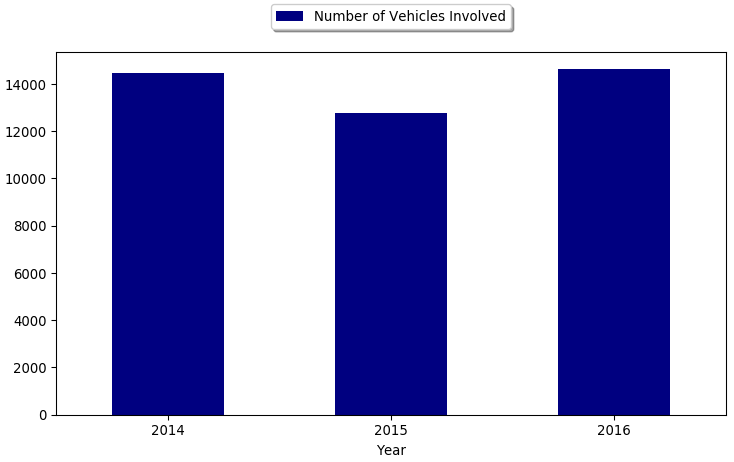

In [ ]:
display(prediction)

### Cluster 2
***

In [17]:
query = spark.sql("SELECT `Event Descriptor`, COUNT(`Event Descriptor`) AS Jumlah \
          FROM crashes  \
          GROUP BY `Event Descriptor`\
          ")
query.show()

+--------------------+------+
|    Event Descriptor|Jumlah|
+--------------------+------+
|Crash Cushion, Co...|   515|
|Barrier, Collisio...|  3568|
|Culver/Head Wall,...|  1091|
|Guide Rail - End,...|  2463|
|Animal, Collision...|  8510|
|Fire Hydrant, Col...|  1441|
|    Other Pedestrian|   726|
|Building/Wall, Co...|  5286|
|Tree, Collision W...| 17224|
|Ran Off Roadway O...|  2025|
|Snow Embankment, ...|  4788|
|             Unknown|  1170|
|Other Object (Not...|  8045|
|Submersion, Non-C...|   151|
|Fence, Collision ...|  3178|
|Median - Not At E...|  2564|
|Median - End, Col...|   316|
|Pedestrian, Colli...| 41109|
|Light Support/Uti...| 18120|
|Earth Embankment/...| 20633|
+--------------------+------+
only showing top 20 rows



### Vector Assembler
***

In [18]:
from pyspark.ml.feature import VectorAssembler


assembler = VectorAssembler(
    inputCols=["Jumlah"],
    outputCol='features')

query = assembler.transform(query)
query.show()

+--------------------+------+---------+
|    Event Descriptor|Jumlah| features|
+--------------------+------+---------+
|Crash Cushion, Co...|   515|  [515.0]|
|Barrier, Collisio...|  3568| [3568.0]|
|Culver/Head Wall,...|  1091| [1091.0]|
|Guide Rail - End,...|  2463| [2463.0]|
|Animal, Collision...|  8510| [8510.0]|
|Fire Hydrant, Col...|  1441| [1441.0]|
|    Other Pedestrian|   726|  [726.0]|
|Building/Wall, Co...|  5286| [5286.0]|
|Tree, Collision W...| 17224|[17224.0]|
|Ran Off Roadway O...|  2025| [2025.0]|
|Snow Embankment, ...|  4788| [4788.0]|
|             Unknown|  1170| [1170.0]|
|Other Object (Not...|  8045| [8045.0]|
|Submersion, Non-C...|   151|  [151.0]|
|Fence, Collision ...|  3178| [3178.0]|
|Median - Not At E...|  2564| [2564.0]|
|Median - End, Col...|   316|  [316.0]|
|Pedestrian, Colli...| 41109|[41109.0]|
|Light Support/Uti...| 18120|[18120.0]|
|Earth Embankment/...| 20633|[20633.0]|
+--------------------+------+---------+
only showing top 20 rows



### kMeans
***

In [23]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans().setK(5).setSeed(1)
model = kmeans.fit(query)

### Predictions
***

In [25]:
predictions = model.transform(query)
predictions.show()

+--------------------+------+---------+----------+
|    Event Descriptor|Jumlah| features|prediction|
+--------------------+------+---------+----------+
|Crash Cushion, Co...|   515|  [515.0]|         0|
|Barrier, Collisio...|  3568| [3568.0]|         0|
|Culver/Head Wall,...|  1091| [1091.0]|         0|
|Guide Rail - End,...|  2463| [2463.0]|         0|
|Animal, Collision...|  8510| [8510.0]|         0|
|Fire Hydrant, Col...|  1441| [1441.0]|         0|
|    Other Pedestrian|   726|  [726.0]|         0|
|Building/Wall, Co...|  5286| [5286.0]|         0|
|Tree, Collision W...| 17224|[17224.0]|         2|
|Ran Off Roadway O...|  2025| [2025.0]|         0|
|Snow Embankment, ...|  4788| [4788.0]|         0|
|             Unknown|  1170| [1170.0]|         0|
|Other Object (Not...|  8045| [8045.0]|         0|
|Submersion, Non-C...|   151|  [151.0]|         0|
|Fence, Collision ...|  3178| [3178.0]|         0|
|Median - Not At E...|  2564| [2564.0]|         0|
|Median - End, Col...|   316|  

### Evaluate
***

In [26]:
from pyspark.ml.evaluation import ClusteringEvaluator

evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.9270001213302528


### Cluster Center
***

In [27]:
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[3190.76]
[609589.]
[19487.4]
[41109.]
[68012.]


### Vizualitation
***

In [28]:
import pixiedust


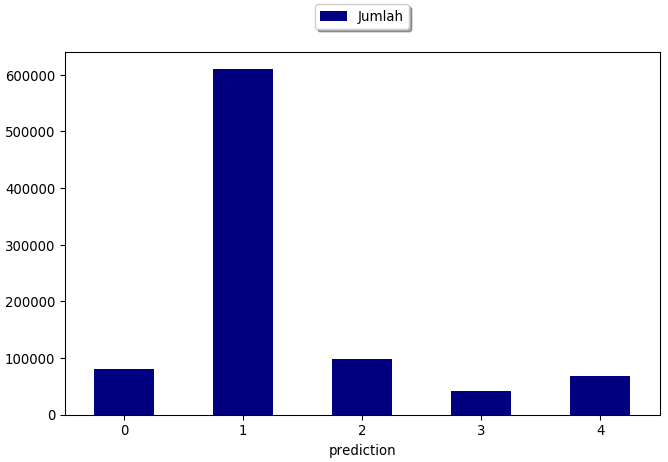

In [ ]:
display(predictions)